In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from load_data import load_financial_data, load_sentiment_data
from preprocessing import calculate_financial_change, aggregate_sentiment, aggregate_financials, merge_sentiment_financials
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import ccf, acf, pacf

In [3]:
tickers = 'BTC'

In [4]:
df_financials = load_financial_data(filepath = 'data/top20_aggre_price_reduced.csv', start_date = '2017-07-28', end_date = '2018-07-27', tickers = tickers)
df_sentiment = load_sentiment_data(filepath = 'data/BTC_sentiment_aggr_shifted.csv', start_date = '2017-07-28', end_date = '2018-07-27')


In [119]:
# Merge the data
df_merged = merge_sentiment_financials(df_financials, df_sentiment)

# Remove retweets and favorites (for now)
df_merged = df_merged.drop(['retweets', 'favorites'], axis = 1)

# Fill the missing values for amount_of_tweets with the ffill method
#df_merged['amount_of_tweets'] = df_merged['amount_of_tweets'].replace(to_replace=0, method = 'ffill')

In [120]:
df_merged['BTC'] = np.log(df_merged['BTC'])


In [111]:
df_merged['BTC'] = df_merged['BTC'] - df_merged['BTC'].shift()
df_merged.dropna(inplace = True)

In [113]:
asdf = adfuller(df_merged['sentiment'], 1)
asdf

(-24.408988047913883,
 0.0,
 1,
 8757,
 {'1%': -3.4310969701841199,
  '5%': -2.8618701112277094,
  '10%': -2.5669457132319233},
 -14505.946017934366)

C:\Users\lukas\AppData\Local\Continuum\anaconda3\envs\sentiment_env\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


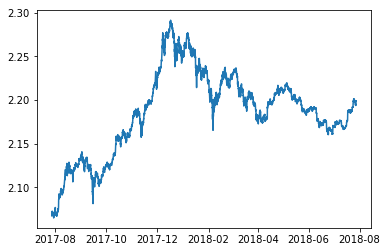

In [118]:
df_merged['BTC'] = np.log(df_merged['BTC'])
df_merged['sentiment'] = np.log(df_merged['sentiment'])
plot.plot(df_merged['BTC'])
plot.plot(df_merged['sentiment'])


In [67]:
crosscor = ccf(df_merged['sentiment'], df_merged['BTC'])

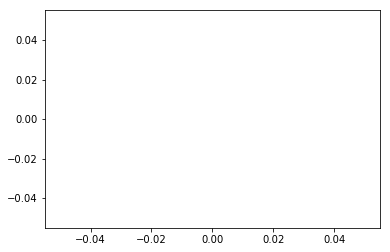

In [68]:
plot.plot(crosscor)

In [6]:
# Make train/test split
size = int(len(df_merged)*0.9)

# Divide into train and test
train_var, test_var = df_merged[0:size], df_merged[size:len(df_merged)]


In [33]:
model = ARIMA(train_var['BTC'], order = (1,1,1), exog = [train_var['sentiment'])
model_fit = model.fit()
output = model_fit.forecast(exog = df_merged['sentiment'][0:size+1])



ValueError: endog and exog matrices are different sizes